In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.11.0


In [34]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
data = pd.read_csv('C:/Users/lenovo/Downloads/archive/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
data.shape

(284807, 31)

In [37]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [40]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [41]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [42]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [43]:
data = fraud.append(non_fraud, ignore_index=True)
data

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21200\96343452.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,148867.0,1.883566,-0.547191,-1.370408,0.001818,0.146426,0.002143,-0.060085,0.003698,0.856190,...,-0.095779,-0.255759,0.133653,0.305012,-0.070819,-0.120860,-0.045400,-0.050674,79.54,0
980,42256.0,0.974845,-0.098885,0.711380,1.264240,-0.769175,-0.681811,-0.030068,0.039930,0.313040,...,-0.184498,-0.794450,0.189342,0.514773,0.052391,-0.699903,0.019361,0.045956,89.00,0
981,165371.0,2.056032,-1.624339,-1.537976,-1.667372,-0.922088,-0.688723,-0.628868,-0.348976,-1.940587,...,0.201241,0.777787,-0.136839,-0.438984,0.095609,0.068913,-0.033699,-0.048341,153.00,0
982,57473.0,1.105914,0.404294,0.697663,2.455847,-0.177871,-0.091641,-0.029817,0.117811,-0.519709,...,-0.227480,-0.812352,0.176829,-0.011534,0.119200,-0.233550,-0.003326,0.025360,21.29,0


In [44]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [45]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [47]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [50]:
X_train.shape

(787, 30)

In [51]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [52]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [53]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_4 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 28, 64)           

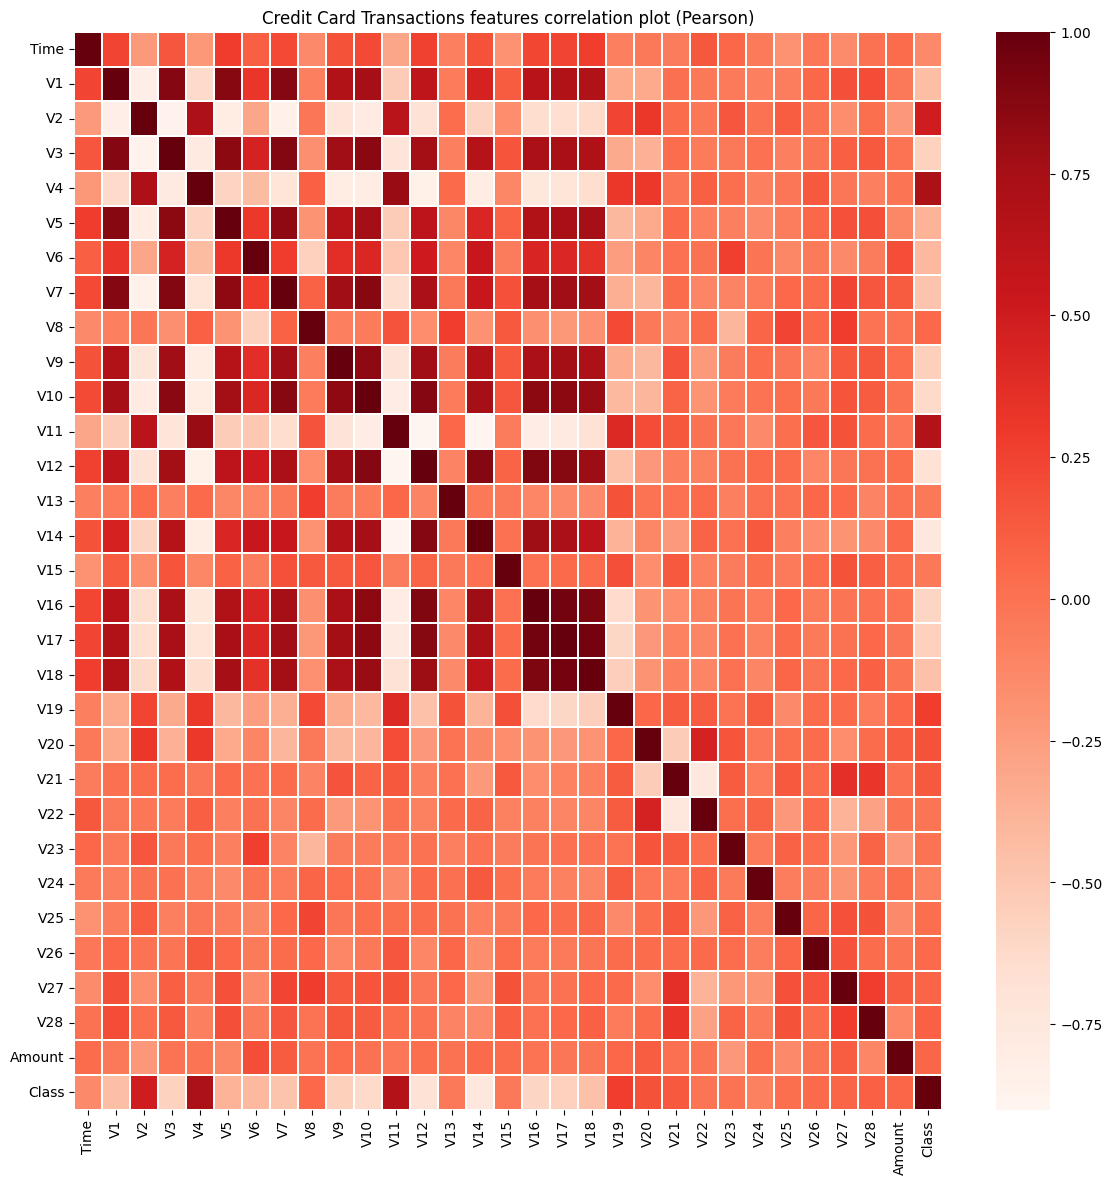

In [55]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [56]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 3s 16ms/step - loss: 0.7222 - accuracy: 0.6366 - val_loss: 0.5881 - val_accuracy: 0.8274
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3995 - accuracy: 0.8348 - val_loss: 0.5513 - val_accuracy: 0.7919
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3497 - accuracy: 0.8653 - val_loss: 0.5229 - val_accuracy: 0.8274
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3140 - accuracy: 0.8907 - val_loss: 0.4974 - val_accuracy: 0.8731
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3001 - accuracy: 0.8907 - val_loss: 0.4675 - val_accuracy: 0.8985
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2724 - accuracy: 0.8958 - val_loss: 0.4362 - val_accuracy: 0.9137
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2478 - accuracy: 0.9187 - val_loss: 0.3974 - val_accuracy: 0.9188
Epoch 8/20
25/25 [=

Epoch 1/50
25/25 [==============================] - 2s 16ms/step - loss: 0.9002 - accuracy: 0.5731 - val_loss: 0.6424 - val_accuracy: 0.7766
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6676 - accuracy: 0.6849 - val_loss: 0.6037 - val_accuracy: 0.7766
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6295 - accuracy: 0.7014 - val_loss: 0.5737 - val_accuracy: 0.7462
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5982 - accuracy: 0.7421 - val_loss: 0.5463 - val_accuracy: 0.7513
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5045 - accuracy: 0.7776 - val_loss: 0.5214 - val_accuracy: 0.7614
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4485 - accuracy: 0.8030 - val_loss: 0.4965 - val_accuracy: 0.7665
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.4228 - accuracy: 0.8285 - val_loss: 0.4728 - val_accuracy: 0.7817
Epoch 8/50
25/25 [=

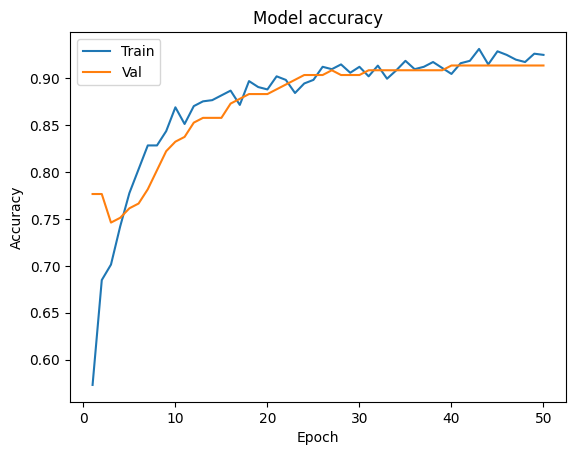

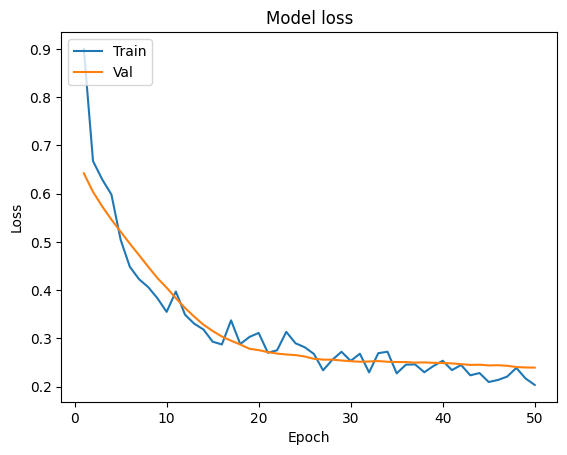

In [58]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

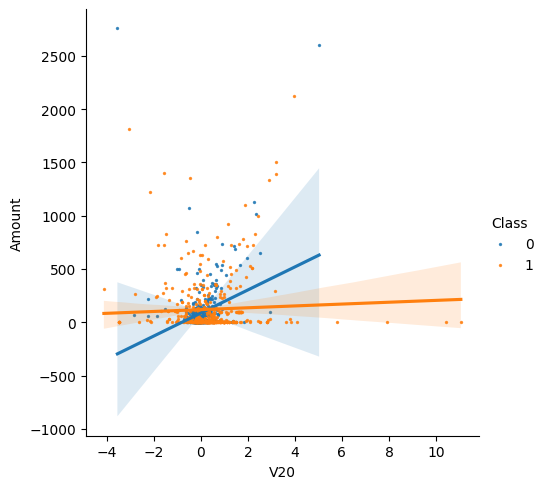

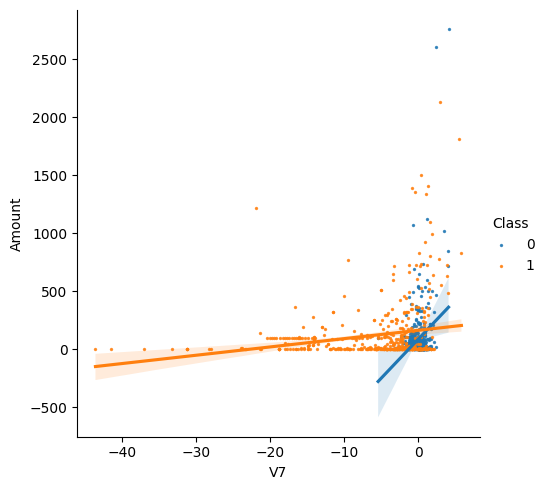

In [59]:
s = sns.lmplot(x='V20', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

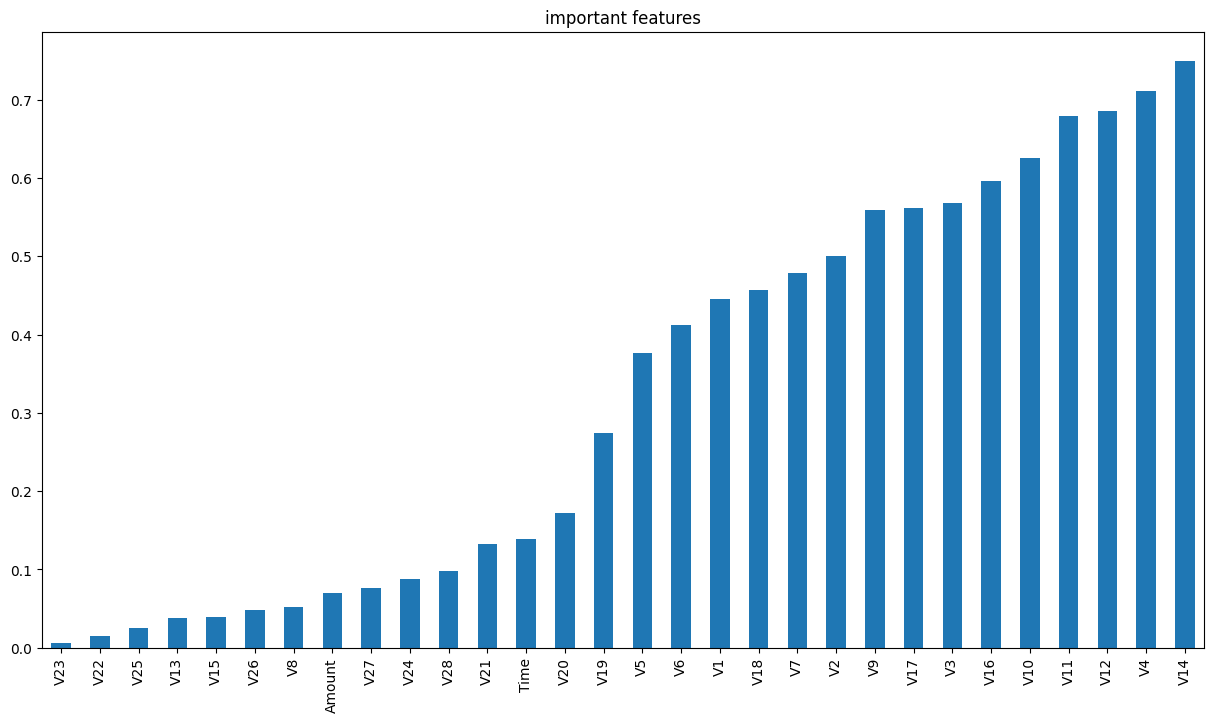

In [60]:
plt.figure(figsize=(15,8))
d=data.corr()['Class'][:-1].abs().sort_values().plot(kind='bar',title='important features')
plt.show()

In [61]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

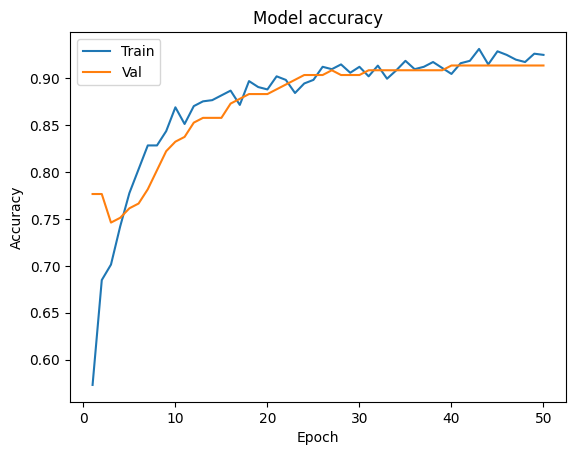

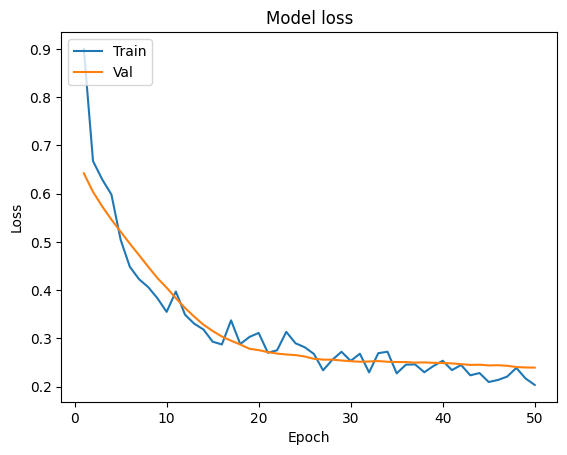

In [62]:
plot_learningCurve(history, epochs)